# Task 2


# Prediction using UnsupervisedMachine Learning

# Name : Subhajit Paramanik

# Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it virtually.

In [64]:
#importing the librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns


In [65]:
#load the iris dataset
iris=pd.read_csv(r"C:\Users\kurku\OneDrive\Desktop\Iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
iris.shape #getting number of rows and columns of dataset

(150, 6)

In [67]:
iris.columns #name os the columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [68]:
print ('Dataset Info:{}'.format(iris.info())) #getting the datatype and info of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Dataset Info:None


In [69]:
print ('Dataset Description:\n\n{}'.format(iris.describe())) #getting the datatype and info of data set

Dataset Description:

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [70]:
#dropping the column not required
iris.drop('Id',inplace=True, axis =1)

In [71]:
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
iris.nunique()
#getting the unique value present in the dataset

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [73]:
import warnings
warnings.filterwarnings('ignore')

# visualizing the data through box plot


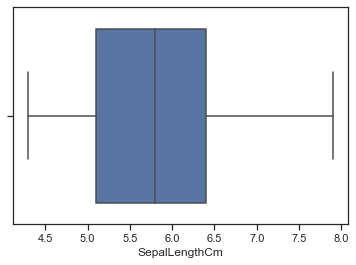

In [74]:
sns.boxplot(iris['SepalLengthCm'])

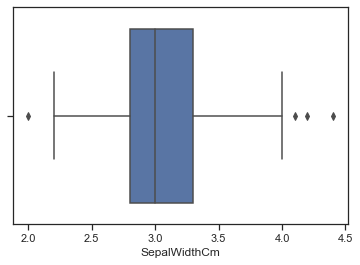

In [75]:
sns.boxplot(iris['SepalWidthCm'])

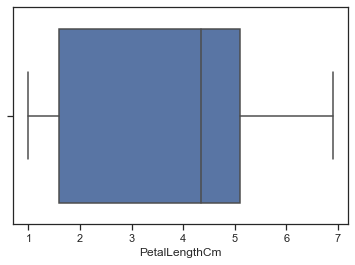

In [76]:
sns.boxplot(iris['PetalLengthCm'])

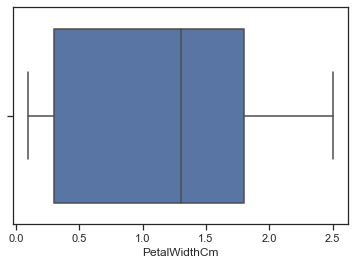

In [77]:
sns.boxplot(iris['PetalWidthCm'])

Now carrying out a statistical approach so as to be sure about the presence of outlier in the data. This approach will detect as well as remove any outlier present in the data set.

In [78]:
#detecting if any outlier is present in the dataset
def outlier_detect(iris):
    for i in iris.describe().columns:
        Q1=iris.describe().at['25%',i]
        Q3=iris.describe().at['75%',i]
        IQR= Q3-Q1
        LTV= Q1-1.5*IQR
        UTV= Q3+1.5*IQR
        iris[i]=iris[i].mask(iris[i]<LTV,LTV)
        iris[i]=iris[i].mask(iris[i]<UTV,UTV)
    return iris


In [79]:
iris=outlier_detect(iris)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8.35,4.05,10.35,4.05,Iris-setosa
1,8.35,4.05,10.35,4.05,Iris-setosa
2,8.35,4.05,10.35,4.05,Iris-setosa
3,8.35,4.05,10.35,4.05,Iris-setosa
4,8.35,4.05,10.35,4.05,Iris-setosa
...,...,...,...,...,...
145,8.35,4.05,10.35,4.05,Iris-virginica
146,8.35,4.05,10.35,4.05,Iris-virginica
147,8.35,4.05,10.35,4.05,Iris-virginica
148,8.35,4.05,10.35,4.05,Iris-virginica


In [80]:
iris.isnull().sum() #Detecting the null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [81]:
iris['Species'].value_counts() #carrying out th e count analysis

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [82]:
iris.corr() #detecting the correlation between the data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000e+00,2.737855e-14,1.000000e+00,1.000000e+00
SepalWidthCm,2.737855e-14,1.000000e+00,2.737855e-14,2.737855e-14
PetalLengthCm,1.000000e+00,2.737855e-14,1.000000e+00,1.000000e+00
PetalWidthCm,1.000000e+00,2.737855e-14,1.000000e+00,1.000000e+00


[Text(0, 0, 'SepalLengthCm'),
 Text(0, 0, 'SepalWidthCm'),
 Text(0, 0, 'PetalLengthCm'),
 Text(0, 0, 'PetalWidthCm'),
 Text(0, 0, 'Species')]

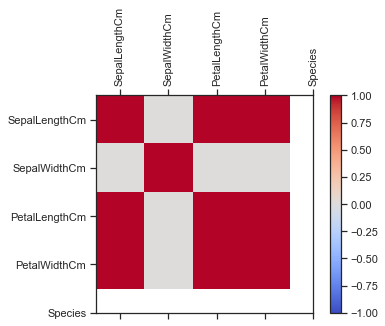

In [83]:
# This is needed for the analysis of two variables,for detecting the imperical relationship between them
iris1 = iris.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(iris1,cmap='coolwarm',vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(iris.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(iris.columns)

ax.set_yticklabels(iris.columns)

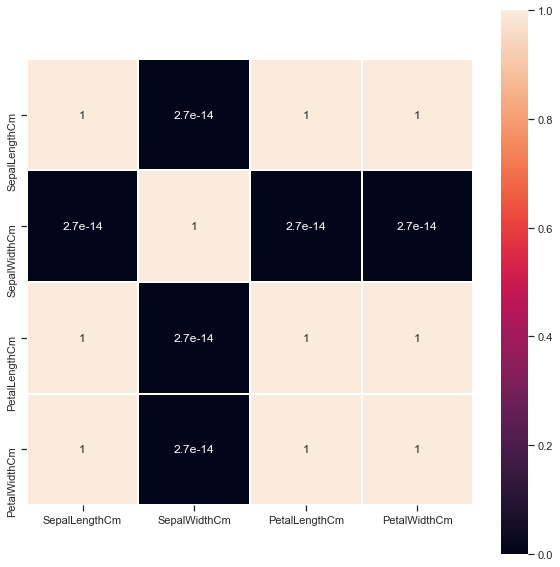

In [84]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data1,vmin=0,vmax=1,square=True,annot=True,Linewidth=1)

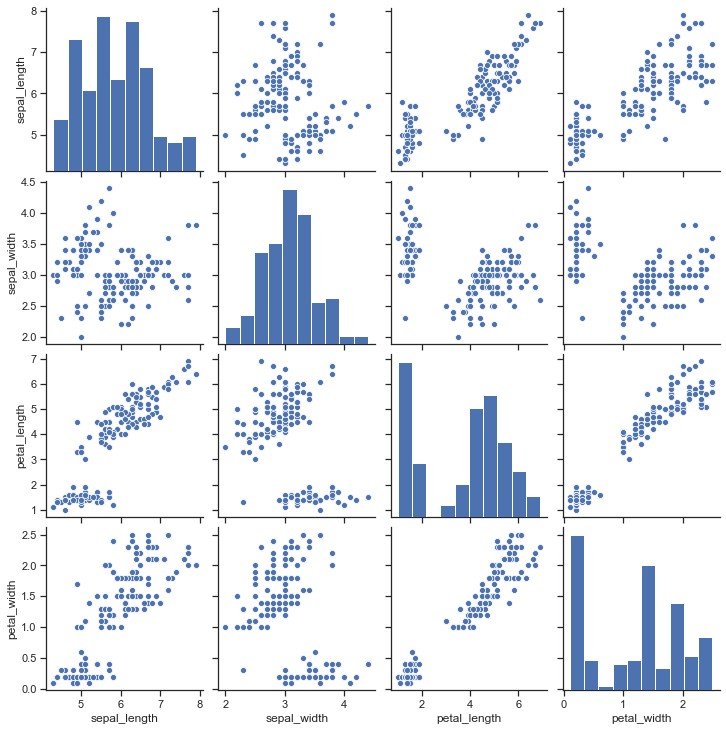

In [85]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g= sns.pairplot(iris)

import matplotlib.pyplot as plt
plt.show()

In [87]:
pd.DataFrame.drop_duplicates(iris)
                        

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Finding the optimum number of clusters for k-means classification 

In [88]:
x=iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range (1,11):
    kmeans = KMeans(n_clusters =i , init = 'k-means++', max_iter = 300, n_init = 10 , random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

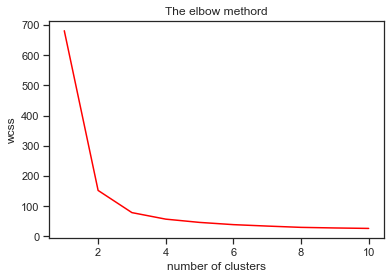

In [90]:
#plotting the results with elbow plot
plt.plot(range(1,11),wcss, color= 'Red')
plt.title('The elbow methord')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [91]:
#applying kmaens to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300,n_init = 10, random_state = 0 )
y_kmeans = kmeans.fit_predict(x)

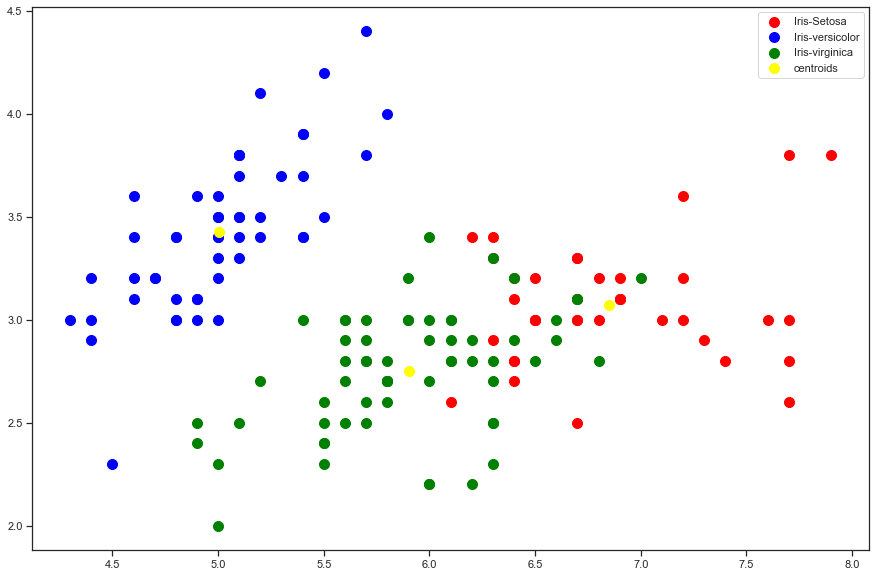

In [92]:
#visualizing the clusters
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1] , s= 100, c= 'red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1] , s= 100, c= 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1] , s= 100, c= 'green', label = 'Iris-virginica')

#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s= 100, c= 'yellow', label = 'centroids')

plt.legend()

# With this task 2 ends 

# Thank you !